# Курсовой проект на тему "Предсказание цены на квартиры"
***

##  1. Анализ данных

Импортируем библиотеки

In [2]:
import pandas as pd

Читаем файл с тренировочными данными train.csv

In [57]:
d = pd.read_csv('train.csv')

Смотрим описание

In [58]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


Так как размеры разные (10000, 7887, 5202), то в данных есть пропуски (неопределенные значения)

Смотрим несколько первых строк

In [59]:
d.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


Посмотрим, что там не так со столбцом LifeSquare

In [103]:
ls = d['LifeSquare']

In [61]:
lsd = pd.Series(ls)

In [62]:
lsd.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

Заменим NaN-значения LifeSquare значениями из столбца Square. Для этого заведем новый датафрейм d_cleared.

In [63]:
d_cleared = d.copy()

In [64]:
d_cleared.loc[ls.isna(), 'LifeSquare'] = d.loc[ls.isna(), 'Square']

In [65]:
d_cleared.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,80.312926,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,64.511437,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [66]:
d_cleared['LifeSquare'].describe()

count    10000.000000
mean        42.091874
std         77.880874
min          0.370619
25%         25.506959
50%         37.562685
75%         50.098049
max       7480.592129
Name: LifeSquare, dtype: float64

Посмотрим на корреляцию LifeSquare и Square, тех, что до замены NaN-ов.

In [85]:
d_tmp = pd.DataFrame({'LS':pd.Series(d['LifeSquare']), 'TS':pd.Series(d['Square'])})

In [86]:
d_tmp.head(10)

,LS,TS
0,29.442751,47.981561
1,40.049543,65.683640
2,29.197612,44.947953
3,52.731512,53.352981
4,23.776169,39.649192
5,46.683720,80.384479
6,37.160377,62.254114
7,NaN,80.312926
8,NaN,64.511437
9,18.915552,46.461409


In [87]:
d_tmp.corr()

,LS,TS
LS,1.000000,0.196129
TS,0.196129,1.000000


In [91]:
import matplotlib.pyplot as plt

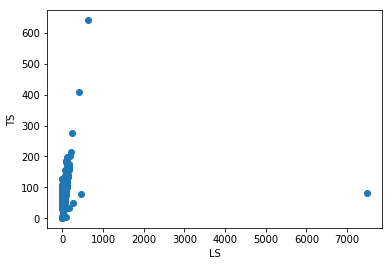

In [108]:
plt.scatter(d_tmp.loc[:,'LS'], d_tmp.loc[:,'TS'])
plt.xlabel('LS')
plt.ylabel('TS')
plt.show()

Удалим выбросы и логически противоречивые данные, и пересчитаем коэффициент корреляции.

In [104]:
d_tmp_cleared = d_tmp.copy()

In [123]:
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['LS'] > 7000].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['TS'] > 7000].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['LS'] > 600].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['TS'] > 600].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['LS'] > d_tmp_cleared['TS']].index, inplace=True)

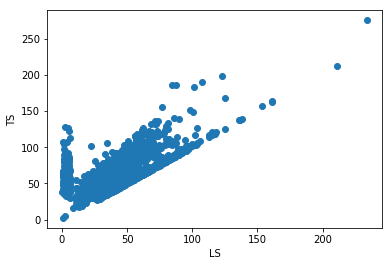

In [124]:
plt.scatter(d_tmp_cleared.loc[:,'LS'], d_tmp_cleared.loc[:,'TS'])
plt.xlabel('LS')
plt.ylabel('TS')
plt.show()

In [142]:
r_TL = d_tmp_cleared.corr()
r_corr = r_TL['LS']['TS']
r_corr

0.7826915415512269

In [141]:
d_tmp_cleared.corr(method='spearman')

,LS,TS
LS,1.000000,0.813652
TS,0.813652,1.000000


Коэффициент корреляции - 0.8. Вывод: LifeSquare и Square довольно-таки коррелированы. Значит, заменяем NaN в LifeSquare соответствующими значениями Square.

In [127]:
d_tmp_cleared.describe()

,LS,TS
count,7404.000000,9516.000000
mean,34.490831,56.074374
std,16.107193,18.841455
min,0.370619,2.377248
25%,22.544752,41.816743
50%,32.020108,52.450782
75%,43.777890,65.832811
max,233.949309,275.645284


In [143]:
d_cleared = d_tmp_cleared.copy()
d_cleared.loc[d_cleared['LS'].isna(), 'LS'] = r_corr * d_cleared.loc[d_cleared['LS'].isna(), 'TS']

In [144]:
d_cleared.head(10)

,LS,TS
0,29.442751,47.981561
1,40.049543,65.683640
2,29.197612,44.947953
3,52.731512,53.352981
4,23.776169,39.649192
5,46.683720,80.384479
6,37.160377,62.254114
7,62.860248,80.312926
8,50.492556,64.511437
9,18.915552,46.461409


Чистка изначального фрейма

In [145]:
d_cleared = d.copy()

In [147]:
d_cleared.drop(d_cleared[d_cleared['LifeSquare'] > 7000].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['Square'] > 7000].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['LifeSquare'] > 600].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['Square'] > 600].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['LifeSquare'] > d_cleared['Square']].index, inplace=True)

Линейное предсказание LifeSquare по Square (через коэфф. корреляции; в среднем, должно быть лучше, чем простое копирование)

In [148]:
d_cleared.loc[d_cleared['LifeSquare'].isna(), 'LifeSquare'] = r_corr * d_cleared.loc[d_cleared['LifeSquare'].isna(), 'Square']

In [150]:
d_cleared.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,62.860248,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,50.492556,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [151]:
d_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 9999
Data columns (total 20 columns):
Id               9516 non-null int64
DistrictId       9516 non-null int64
Rooms            9516 non-null float64
Square           9516 non-null float64
LifeSquare       9516 non-null float64
KitchenSquare    9516 non-null float64
Floor            9516 non-null int64
HouseFloor       9516 non-null float64
HouseYear        9516 non-null int64
Ecology_1        9516 non-null float64
Ecology_2        9516 non-null object
Ecology_3        9516 non-null object
Social_1         9516 non-null int64
Social_2         9516 non-null int64
Social_3         9516 non-null int64
Healthcare_1     5031 non-null float64
Helthcare_2      9516 non-null int64
Shops_1          9516 non-null int64
Shops_2          9516 non-null object
Price            9516 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB
